- 运行前请先将 q5_lib.py 置于相同目录下以便进行代码调用。
- 运行前请先安装 pytorch，执行以下命令：`pip install torch torchvision`
    - 若你的操作系统是 macOS 且带有 M 系列显卡，那么此时已支持 GPU 调用，以下代码会自动识别你电脑中可用的 GPU 并调用； 
    - 若你的操作系统是 Windows，以上命令默认安装的是 **CPU 版 pytorch**，不支持 GPU 调用，若想安装 GPU 版 pytorch 可自行前往 pytorch 官网查找与自己电脑 cuda 版本兼容的 pytorch 安装命令（终端输入 nvidia-smi 查看 cuda 版本）；
    - 该任务只使用 CPU 也可以运行（完整地跑一次大概需要 15min），建议多观察训练曲线，视情况提前终止不合适的学习率训练过程（合适的训练曲线应保证训练过程中损失范围与示例截图中一致，损失过大说明学习率过大，收敛过慢说明学习率过小都应提前终止训练）。
- 仅需修改两处 `####` 标出的参数，其余部分不需要改动。
- 仅需提交寻找到的适配 SGD 和 Adam 的学习率大小以及两张训练过程的截图，该代码无需提交。

In [1]:
from q5_lib import *

# 计算设备
if torch.cuda.is_available():
    device = torch.device('cuda')
    print('NVIDIA GPU (CUDA) Available!')
elif torch.backends.mps.is_available():
    device = torch.device('mps')
    print('Apple GPU (MPS) Available!')
else:
    device = torch.device('cpu')
    print('Only CPU Available!')

# 超参数
batch_size, num_epochs = 128, 20  #### lr as followed
size = 28  # 将图像大小转换为 size x size

Apple GPU (MPS) Available!


In [2]:
# 网络结构
def get_model():
    model = nn.Sequential(
        nn.Conv2d(1, 6, kernel_size=5, padding=2), nn.Sigmoid(),
        nn.AvgPool2d(kernel_size=2, stride=2),
        nn.Conv2d(6, 16, kernel_size=5), nn.Sigmoid(),
        nn.AvgPool2d(kernel_size=2, stride=2),
        nn.Flatten(),
        nn.Linear(16 * 5 * 5, 120), nn.Sigmoid(),
        nn.Linear(120, 84), nn.Sigmoid(),
        nn.Linear(84, 10),
    ).to(device)
    return model

train loss: 0.412, train acc: 0.853, best test acc: 0.849
15033.5 examples/sec


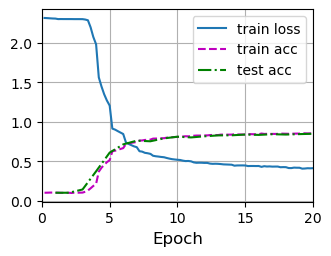

In [ ]:
# 损失函数、优化器
loss_fn = nn.CrossEntropyLoss()
model_sgd = get_model()

lr = 0.1
optimizer = torch.optim.SGD(
    model_sgd.parameters(), 
    lr=lr,
    momentum=0.9,
    weight_decay=5e-4,  # L2 norm
    nesterov=True
)
"""
train loss: 0.412, train acc: 0.853, best test acc: 0.849
15033.5 examples/se
"""

# 数据导入、模型训练与评估
train_iter, test_iter = load_data_fashion_mnist(batch_size, resize=size)
train(model_sgd, train_iter, test_iter, num_epochs, loss_fn, optimizer, device)

train loss: 0.336, train acc: 0.875, best test acc: 0.862
12346.3 examples/sec


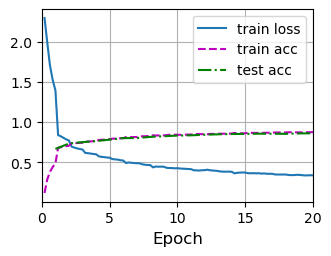

In [ ]:
# 损失函数、优化器
loss_fn = nn.CrossEntropyLoss()
model_adam = get_model()

lr = 0.001
optimizer = torch.optim.Adam(
    model_adam.parameters(),
    lr=lr
)
"""
train loss: 0.336, train acc: 0.875, best test acc: 0.862
12346.3 examples/sec
"""

# 数据导入、模型训练与评估
train_iter, test_iter = load_data_fashion_mnist(batch_size, resize=size)
train(model_adam, train_iter, test_iter, num_epochs, loss_fn, optimizer, device)